In [31]:
import tensorflow as tf
import os
import pathlib
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [32]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print(f"TensorFlow is using GPU: {gpus}")
else:
    print("TensorFlow is not using a GPU.")

TensorFlow is using GPU: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [33]:
dataset_directory = './ImageSet'
data_dir = pathlib.Path(dataset_directory)
all_image_paths = list(data_dir.glob('*'))
all_image_paths = [str(path) for path in all_image_paths]
train_paths, test_paths = train_test_split(all_image_paths, test_size=0.2, random_state=42)

In [34]:
train_dataset = tf.data.Dataset.from_tensor_slices(train_paths)

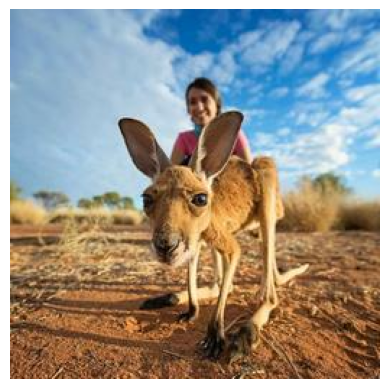

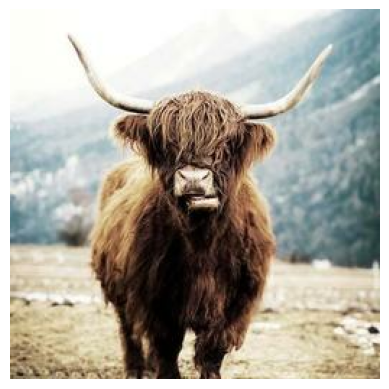

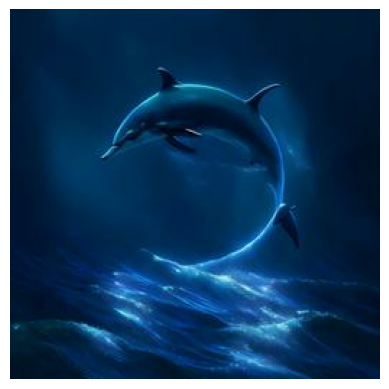

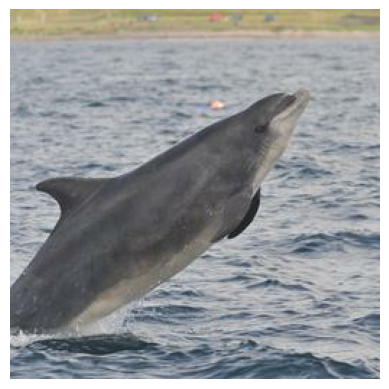

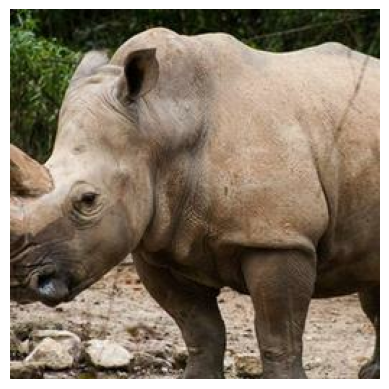

In [35]:
def load_and_decode_image(file_path):
    image = tf.io.read_file(file_path)
    image = tf.image.decode_image(image, channels=3)
    return image
train_dataset = train_dataset.map(load_and_decode_image)

for image in train_dataset.take(5):
    plt.imshow(image.numpy())
    plt.axis('off')  # Hide axis
    plt.show()